# Data reading and Pre-processing
 here that data taken into consideration that will be used for predict the trejectory of hurricane

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Libraries**

In [0]:
import pandas as pd
import numpy as np

import timeit
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from ipywidgets import interact
#from sklearn.datasets import fetch_mldata

%matplotlib inline

**Read the data**

In [8]:
# data = pd.read_csv('/content/drive/My Drive/Machine Learning/Hurricane/Code/checkpoint-dataframe.csv', index_col=0) 
data = pd.read_csv('/content/drive/My Drive/ML_2020/Project code/checkpoint-dataframe.csv', index_col=0) 

print(data.shape)
data.head()


(13131, 11)


,Month,Day,Hour,Lat,Long,WindSpeed,Pressure,unique-key,distance,direction,gridID
116,8,13,18,22.5,-93.5,30.0,1008,BERYL-2000-5,0.000000,0.000000,1860.0
117,8,14,0,22.7,-93.8,30.0,1008,BERYL-2000-5,23.610733,140.567975,1860.0
118,8,14,6,23.1,-94.6,35.0,1007,BERYL-2000-5,57.951317,161.351184,1859.0
119,8,14,12,23.5,-95.4,40.0,1009,BERYL-2000-5,57.818260,174.302218,1981.0
120,8,14,18,23.9,-96.3,45.0,1009,BERYL-2000-5,63.310039,337.250833,1981.0


**Data pre-processing**

In [9]:
mix_year_hurri_num=  data['unique-key'].str.split('-',n=2,expand=True)

data['year'] = mix_year_hurri_num[1]
data['hurricane_number'] = mix_year_hurri_num[2]

data = data[~data['year'].str.contains("TWO")]

data['year'] = data['year'].astype(int)
data['hurricane_number'] = data['hurricane_number'].astype(int)

# Delete the columns of information that we are not using so far
data.drop(['unique-key'], axis = 1, inplace = True)

#data = np.array(data)
#data = data[:8, :]
print(data.shape)
print(data)

(13104, 12)
       Month  Day  Hour   Lat  ...   direction  gridID  year  hurricane_number
116        8   13    18  22.5  ...    0.000000  1860.0  2000                 5
117        8   14     0  22.7  ...  140.567975  1860.0  2000                 5
118        8   14     6  23.1  ...  161.351184  1859.0  2000                 5
119        8   14    12  23.5  ...  174.302218  1981.0  2000                 5
120        8   14    18  23.9  ...  337.250833  1981.0  2000                 5
...      ...  ...   ...   ...  ...         ...     ...   ...               ...
33162      9   28    12  24.9  ...   16.567852  2119.0  1929                 2
33163      9   28    13  25.0  ...  185.868985  2119.0  1929                 2
33174     10    1     4  30.2  ...   32.902723  2852.0  1929                 2
33175     10    1     6  30.4  ...   19.576091  2852.0  1929                 2
33176     10    1    12  31.0  ...   58.545288  2854.0  1929                 2

[13104 rows x 12 columns]


**Description of data**

In [10]:
data.describe()

,Month,Day,Hour,Lat,Long,WindSpeed,Pressure,distance,direction,gridID,year,hurricane_number
count,13104.000000,13104.000000,13104.000000,13104.000000,13104.000000,13104.000000,13104.000000,13104.000000,13104.000000,13104.000000,13104.000000,13104.000000
mean,8.721993,15.837988,9.186508,26.913126,-64.388271,50.923153,993.834020,89.112623,171.476214,2410.704747,1992.917735,9.512210
std,1.376036,8.913061,6.729815,9.814612,20.200861,25.914815,18.030209,85.564815,112.524342,1211.130241,14.895226,5.880465
min,1.000000,1.000000,0.000000,7.200000,-109.300000,10.000000,882.000000,0.000000,0.000000,64.000000,1928.000000,1.000000
25%,8.000000,8.000000,6.000000,18.900000,-80.800000,30.000000,987.000000,43.552785,70.931121,1405.000000,1983.000000,5.000000
50%,9.000000,16.000000,12.000000,26.700000,-65.800000,45.000000,1000.000000,72.781029,177.125295,2372.000000,1996.000000,9.000000
75%,10.000000,24.000000,18.000000,33.300000,-49.500000,65.000000,1006.000000,111.210945,264.514522,3224.250000,2005.000000,13.000000
max,12.000000,31.000000,23.000000,66.000000,13.500000,165.000000,1024.000000,1767.320184,359.938162,7256.000000,2012.000000,31.000000


# Functions
1.   normalize
2.   eigen value
3.   projection matrix
4.   MSE (Mean Square Error)
5.   PCA
6.   PCA_non_ordered_eig_val



In [0]:
def normalize(X):
    """Normalize the given dataset X
    Args:
        X: ndarray, dataset

    Returns:
        (Xbar, mean, std): tuple of ndarray, Xbar is the normalized dataset
        with mean 0 and standard deviation 1; mean and std are the
        mean and standard deviation respectively.

    Note:
        You will encounter dimensions where the standard deviation is
        zero, for those when you do normalization the normalized data
        will be NaN. Handle this by setting using `std = 1` for those
        dimensions when doing normalization.
    """
    mu = np.mean(X, axis=0) # <-- Q1: Compute the mean of X
    std = np.std(X, axis=0)# <-- Q2: Compute the std of X
    std_filled = std.copy()
    std_filled[std==0] = 1.
    Xbar = (X-mu)/std_filled # <-- Q3: Compute the normalized data Xbar
    return Xbar, mu, std # Q4-Q6 are below

In [0]:
def eig_sort(S):
    """Compute the eigenvalues and corresponding eigenvectors
        for the covariance matrix S.
    Args:
        S: ndarray, covariance matrix

    Returns:
        ray, the eigenvalues and eigenvectors
    Note:
        the eigenvals and eigenvecs should be sorted in descending
        order of the eigen values
    """
    eigvals, eigvecs = np.linalg.eig(S)
    #Q7 Write code here to sort eigen values and corresponding eigen vectors in descending order
    idx = eigvals.argsort()[::-1]   
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:,idx]


    return (eigvals, eigvecs) # <-- Q8: EDIT this to return the eigenvalues and corresponding eigenvectors

In [0]:
def projection_matrix(B):
    """Compute the projection matrix onto the space spanned by `B`
    Args:
        B: ndarray of dimension (D, M), the basis for the subspace

    Returns:
        P: the projection matrix
    """
    P = np.matmul(B, B.T) # <-- Q9: EDIT THIS to compute the projection matrix
    return P

In [0]:
def mse(predict, actual):
    """Helper function for computing the mean squared error (MSE)"""
    return np.square(predict - actual).sum(axis=1).mean()

In [0]:
def PCA(X, num_components, sort = True):
    """
    Args:
        X: ndarray of size (N, D), where D is the dimension of the data,
        and N is the number of datapoints
        num_components: the number of principal components to use.
        sort: eigen value and vector in sort order
    Returns:
        X_reconstruct: ndarray of the reconstruction
        of X from the first `num_components` principal components.
    """
    # your solution should take advantage of the functions you have implemented above.
    Xbar, mu, std = normalize(X)
    
    covariance = np.matmul(Xbar.T,Xbar)
    # print(covariance.shape)
    S = covariance
    if sort == True:
        eigvals, eigvecs = eig_sort(S)
    else:
        eigvals, eigvecs = np.linalg.eig(S)
    # eigen_trans = eigvecs.T
    # B = np.stack(eigen_trans[:,:num_components])
    B = np.stack(eigvecs[:,:num_components])
    P = np.matmul(B,B.T)
    X_reconstruct = np.matmul(P,X.T)
    X_reconstruct = X_reconstruct.T
    return X_reconstruct # <-- EDIT THIS to return the reconstruction of X
     # <-- Q11: EDIT THIS to return the reconstruction of X

PCA with non ordered eigen values

In [16]:
'''
def PCA_non_ordered_eig_val(X, num_components):
    """
    Args:
        X: ndarray of size (N, D), where D is the dimension of the data,
        and N is the number of datapoints
        num_components: the number of principal components to use.
    Returns:
        X_reconstruct: ndarray of the reconstruction
        of X from the first `num_components` principal components.
    """
    # your solution should take advantage of the functions you have implemented above.
    Xbar, mu, std = normalize(X)
    
    covariance = np.matmul(Xbar.T,Xbar)
    print(covariance.shape)
    S = covariance
    eigvals, eigvecs = np.linalg.eig(S)
    # eigen_trans = eigvecs.T
    # B = np.stack(eigen_trans[:,:num_components])
    B = np.stack(eigvecs[:,:num_components])
    P = np.matmul(B,B.T)
    X_reconstruct = np.matmul(P,X.T)
    X_reconstruct = X_reconstruct.T
    return X_reconstruct # <-- EDIT THIS to return the reconstruction of X
     # <-- Q11: EDIT THIS to return the reconstruction of X
'''

'\ndef PCA_non_ordered_eig_val(X, num_components):\n    """\n    Args:\n        X: ndarray of size (N, D), where D is the dimension of the data,\n        and N is the number of datapoints\n        num_components: the number of principal components to use.\n    Returns:\n        X_reconstruct: ndarray of the reconstruction\n        of X from the first `num_components` principal components.\n    """\n    # your solution should take advantage of the functions you have implemented above.\n    Xbar, mu, std = normalize(X)\n    \n    covariance = np.matmul(Xbar.T,Xbar)\n    print(covariance.shape)\n    S = covariance\n    eigvals, eigvecs = np.linalg.eig(S)\n    # eigen_trans = eigvecs.T\n    # B = np.stack(eigen_trans[:,:num_components])\n    B = np.stack(eigvecs[:,:num_components])\n    P = np.matmul(B,B.T)\n    X_reconstruct = np.matmul(P,X.T)\n    X_reconstruct = X_reconstruct.T\n    return X_reconstruct # <-- EDIT THIS to return the reconstruction of X\n     # <-- Q11: EDIT THIS to retu

# PCA Implementation

##Compare Normalize data using library and Normalize using function mentioned in previous section

In [17]:
## Some preprocessing of the data

X = np.array(data)
# X = data.to_numpy()
print('x',X.shape)
Xbar, mu, std = normalize(X) # Q4: Call the function and examine the shapes of Xbar, mu and std


x (13104, 12)


In [18]:
S = np.matmul(Xbar.T, Xbar)
print(S.shape)
np.trace(S)


(12, 12)


157248.00000000006

In [19]:
# Normalization can also be done as below by library: (simply run the cell and verify its trace with the trace found above)
from sklearn.preprocessing import StandardScaler#try

standardized_data = StandardScaler(with_mean=True,with_std=True)
standardized_data = standardized_data.fit_transform(Xbar)
print(standardized_data.shape)
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T, sample_data)

print ( "The shape of covariance matrix = ", covar_matrix.shape)

print(np.trace(covar_matrix))

(13104, 12)
The shape of covariance matrix =  (12, 12)
157248.0000000001


##PCA

In [20]:
num_components=5
print('Xbar', Xbar.shape)
X_recon = PCA(X, num_components)
print('X_rec',X_recon.shape)

Xbar (13104, 12)
X_rec (13104, 12)


In [33]:
loss_sort = []
loss_nsort = []

reconstructions = []
# iterate over different numbers of principal components, and compute the MSE
for num_component in range(1, 8):
    print('\n------------- num_component =',num_component ,'-------------')

    reconst_sort = PCA(Xbar, num_component, sort=True)
    error_sort = mse(reconst_sort, Xbar)
    reconstructions.append(reconst_sort)
    loss_sort.append((num_component, error_sort))
    print('Sorted: reconstruction_error = {:f}'.format(error_sort))

    reconst_nsort = PCA(Xbar, num_component, sort=False)
    error_nsort = mse(reconst_nsort, Xbar)
    loss_nsort.append((num_component, error_nsort))
    print('Non Sorted: reconstruction_error = {:f}'.format(error_nsort))
    
    

reconstructions = np.asarray(reconstructions)
reconstructions = reconstructions * std + mu # "unnormalize" the reconstructed image
loss_sort = np.asarray(loss_sort)

loss_nsort = np.asarray(loss_nsort)


------------- num_component = 1 -------------
Sorted: reconstruction_error = 9.699718
Non Sorted: reconstruction_error = 9.699718

------------- num_component = 2 -------------
Sorted: reconstruction_error = 7.664719
Non Sorted: reconstruction_error = 7.664719

------------- num_component = 3 -------------
Sorted: reconstruction_error = 6.009714
Non Sorted: reconstruction_error = 6.009714

------------- num_component = 4 -------------
Sorted: reconstruction_error = 4.934836
Non Sorted: reconstruction_error = 5.737837

------------- num_component = 5 -------------
Sorted: reconstruction_error = 3.882095
Non Sorted: reconstruction_error = 5.666950

------------- num_component = 6 -------------
Sorted: reconstruction_error = 2.870607
Non Sorted: reconstruction_error = 5.666525

------------- num_component = 7 -------------
Sorted: reconstruction_error = 1.901649
Non Sorted: reconstruction_error = 5.022730


In [34]:
# create a table showing the number of principal components and MSE
pd.DataFrame(loss_sort).head()

,0,1
0,1.0,9.699718
1,2.0,7.664719
2,3.0,6.009714
3,4.0,4.934836
4,5.0,3.882095


We can also put these numbers into perspective by plotting them.

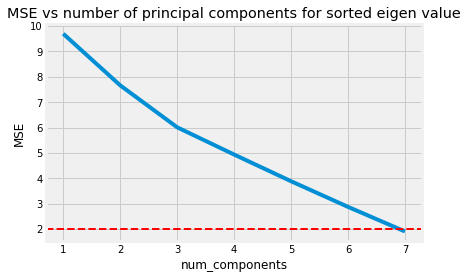

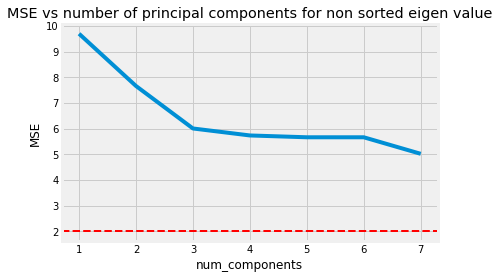

In [35]:

fig, ax = plt.subplots()
ax.plot(loss_sort[:,0], loss_sort[:,1])
ax.axhline(2, linestyle='--', color='r', linewidth=2)
ax.xaxis.set_ticks(np.arange(1, 8, 1));
ax.set(xlabel='num_components', ylabel='MSE', title='MSE vs number of principal components for sorted eigen value');

fig, ax = plt.subplots()
ax.plot(loss_nsort[:,0], loss_nsort[:,1])
ax.axhline(2, linestyle='--', color='r', linewidth=2)
ax.xaxis.set_ticks(np.arange(1, 8, 1));
ax.set(xlabel='num_components', ylabel='MSE', title='MSE vs number of principal components for non sorted eigen value');



Compute graph Eigenvalue vs Index

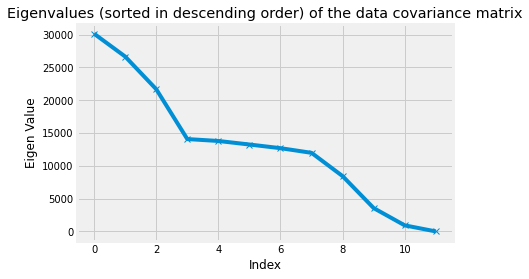

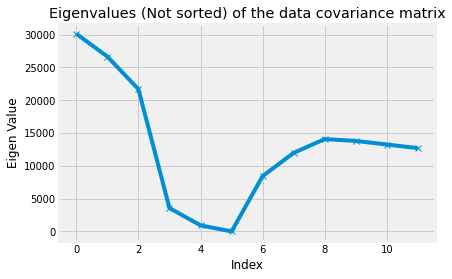

In [32]:
'''
fig, ax = plt.subplots()
ax.plot(range(len(eigvals)), eigvals);
#ax.xaxis.set_ticks(np.arange(1, 10, 5));
ax.set(xlabel='Index', ylabel='Eigen Value', title='Eigenvalues (sorted in descending order) of the data covariance matrix of all digits 8 in the MNIST training set.');
'''
Xbar, mu, std = normalize(X)    
covariance = np.matmul(Xbar.T,Xbar)
# print(covariance.shape)
S = covariance

eigvals_sort, eigvecs_sort = eig_sort(S)

eigvals_nsort, eigvecs_nsort = np.linalg.eig(S)

fig, ax = plt.subplots()
ax.plot(range(len(eigvals_sort)), eigvals_sort,marker="x")
ax.set(xlabel='Index', ylabel='Eigen Value', title='Eigenvalues (sorted in descending order) of the data covariance matrix');

fig, ax = plt.subplots()
ax.plot(range(len(eigvals_nsort)), eigvals_nsort,marker="x")
ax.set(xlabel='Index', ylabel='Eigen Value', title='Eigenvalues (Not sorted) of the data covariance matrix');


Compute Graph captured variance vs Number of principle component

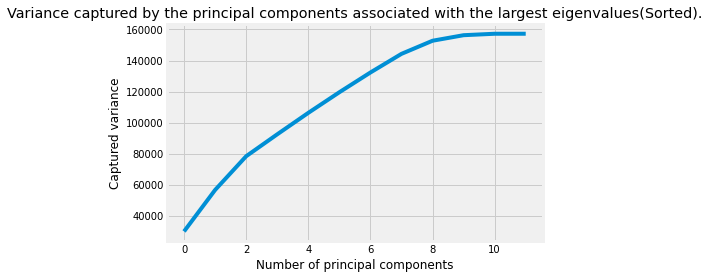

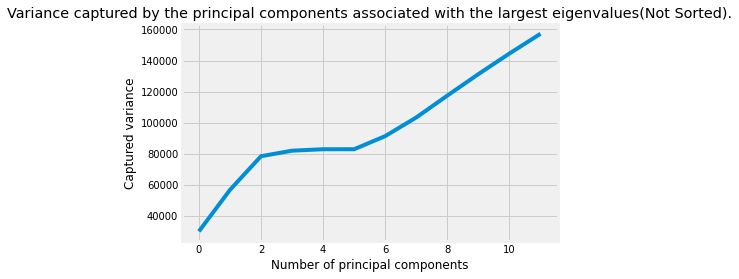

In [25]:
#import pandas as pd
seris_eigval_sort = pd.Series(eigvals_sort)

seris_eigval_nsort = pd.Series(eigvals_nsort)


fig, ax = plt.subplots()
ax.plot(range(len(eigvals_sort)), seris_eigval_sort.cumsum());
#ax.xaxis.set_ticks(np.arange(1, 10, 5));
ax.set(ylabel='Captured variance', xlabel='Number of principal components', title='Variance captured by the principal components associated with the largest eigenvalues(Sorted).');
plt.show()

fig, ax = plt.subplots()
ax.plot(range(len(eigvals_nsort)), seris_eigval_nsort.cumsum());
#ax.xaxis.set_ticks(np.arange(1, 10, 5));
ax.set(ylabel='Captured variance', xlabel='Number of principal components', title='Variance captured by the principal components associated with the largest eigenvalues(Not Sorted).');
plt.show()
